In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import listdir, path

In [2]:
DATASET = "dataset"
TRAINSET = "{0}/keras_png_slices_train".format(DATASET)
TESTSET = "{0}/keras_png_slices_test".format(DATASET)

In [3]:
def train_set():
    train_dataset = []
    for i in listdir(TRAINSET):
        source = "{}/{}".format(TRAINSET, i)
        train_dataset.append(
            mpimg.imread(source)
        )
    return train_dataset

def test_set():
    test_dataset = []
    for i in listdir(TESTSET):
        source = "{}/{}".format(TESTSET, i)
        test_dataset.append(
            mpimg.imread(source)
        )
    return test_dataset

In [4]:
train_dataset = train_set()

In [5]:
test_dataset = test_set()

In [18]:
# Build the generator model
def generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(4*4*256, use_bias=False, input_shape=(120,)))
    model.add(layers.BatchNormalization())
    model.add(layers.Reshape((4, 4, 256)))
    
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding="same", activation="relu"))
    model.add(layers.BatchNormalization())
    
    
    model.add(layers.Conv2DTranspose(8, (5, 5), strides=(2,2 ), padding="same", activation="relu"))
    model.add(layers.BatchNormalization())
    
    
    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(4,4), padding="same", activation="relu"))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2DTranspose(200, (16,16), strides=(8, 8), padding="same",activation="tanh"))
    return model
    

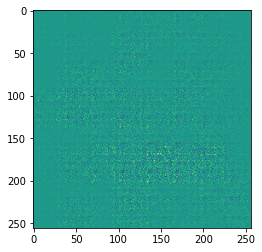

In [22]:
generator = generator_model()
noise = tf.random.normal([1, 120])
generated_image = generator(noise, training=False)